<a href="https://colab.research.google.com/github/NicoPP1/PDI/blob/main/TP2/Pr%C3%A1ctico_N%C2%BA2_Parma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
En el presente trabajo se desarrolla la actividad práctica Nº2, en donde en la primer sección se busca manipular las componentes luminancia y saturación de una imagen. 

En la segunda sección se modificarán los mapcolor de una imagen.

## Ejercicio 1, modificar la luminancia y saturación de una imagen


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


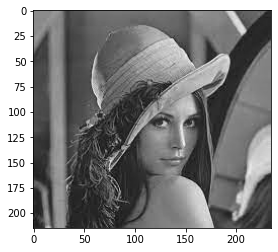

In [ ]:
#@title  { run: "auto", vertical-output: true }
#@title  { run: "auto" }
#@title  { run: "auto", vertical-output: true }

#Librerias
import imageio
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount= False)

#importo imagen
img = imageio.imread('/content/drive/MyDrive/PDI imagenes/lenna.jpg')

#Verifico que la luminancia no se encuentre fuera de rango
def checkY(mat):
  flag = True
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          if mat[i,j] > 1:
              flag = False
  return flag

#Verifico que el componente en fase no se encuentre fuera de rango
def checkI(mat):
  flag = True
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          if (I[i,j] >= 0.5957) or (I[i,j] <= -0.5957):
              flag = False
  return flag

#Verifico que el componente en cuadratura no se encuentre fuera de rango
def checkQ(mat):
  flag = True
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          if (Q[i,j] >= 0.5226) or (Q[i,j] <= -0.5226):
              flag = False
  return flag

#Obtengo componentes RGB de una imagen y devuelvo YIQ
def RGB2YIQ(img):
  r = img[:,:,0]/255
  g = img[:,:,1]/255
  b = img[:,:,2]/255

  Y = (r*0.299+g*0.587+b*0.114)
  I = (r*0.595716-g*0.274453-b*0.321263)
  Q = (r*0.211456-g*0.522591+b*0.311135)

  return(Y,I,Q)

#A partir de componentes YIQ modificadas forma una imagen nueva en RGB
def YIQ2RGB(Y,I,Q):
  if (checkY(Y) and (checkI(I)) and checkQ(Q)):
    r_conv = (Y+0.9563*I+0.621*Q)*255
    g_conv = (Y-0.2721*I-0.6474*Q)*255
    b_conv = (Y-1.1070*I+1.7046*Q)*255

    img = np.dstack((r_conv,g_conv,b_conv)).round(decimals = 0)
    img = img.astype('uint8')  

    return(img)
  else:
    print("No se cumple condición amplitud YIQ")


#Llamo a la función para obtener las componentes YIQ
Y,I,Q = RGB2YIQ(img)

#Sliders para modificar luminancia y saturación
alpha = 1.1 #@param {type:"slider", min:0, max:2, step:0.1}
beta = 0 #@param {type:"slider", min:0, max:2, step:0.1}
img_mod = YIQ2RGB(alpha*Y,beta*I,beta*Q)
plt.imshow(img_mod)



# Conclusiones
Se pudo modificar la luminancia y saturación de una imagen RGB, transformando la misma al espacio de colores YIQ para poder manipular dichas componentes y obtener la imagen modificada deseada mediante los sliders de $\alpha$ y $\beta$.


# Mapas de colores
## Ejercicio dos, modificar la paleta de colores de una imagen 
### ejecutar esté código antes de modificar la paleta de colores mediante texto en la ultima sección


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mapa de color Viridis


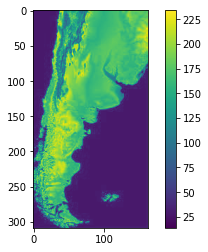

In [ ]:
#Librerias
import imageio
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount= False)

#Abro imagen
arg = imageio.imread('/content/drive/MyDrive/PDI imagenes/arg.jpg')

#Verifico que la luminancia no se encuentre fuera de rango
def checkY(mat):
  flag = True
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          if mat[i,j] > 1:
              flag = False
  return flag

#Verifico que el componente en fase no se encuentre fuera de rango
def checkI(mat):
  flag = True
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          if (I[i,j] >= 0.5957) or (I[i,j] <= -0.5957):
              flag = False
  return flag
  
#Verifico que el componente en cuadratura no se encuentre fuera de rango
def checkQ(mat):
  flag = True
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          if (Q[i,j] >= 0.5226) or (Q[i,j] <= -0.5226):
              flag = False
  return flag

#Obtengo componentes YIQ a partir de una imagen RGB
def RGB2YIQ(img):
  r = img[:,:,0]/255
  g = img[:,:,1]/255
  b = img[:,:,2]/255

  Y = (r*0.299+g*0.587+b*0.114)*255
  I = (r*0.595716-g*0.274453-b*0.321263)*255
  Q = (r*0.211456-g*0.522591+b*0.311135)*255

  return(Y,I,Q)

#Llamo a la función para obtener las componentes YIQ
Y,I,Q = RGB2YIQ(arg)

#Muestro imagen con el mapcolor modificado
print("Mapa de color Viridis")
plt.imshow(Y, cmap = 'viridis')
plt.colorbar()

Mapa de color Prism


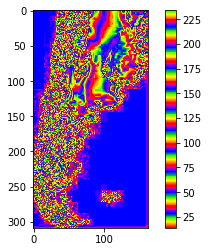

In [ ]:
#Muestro imagen con el mapcolor modificado
print("Mapa de color Prism")
plt.imshow(Y, cmap = 'prism')
plt.colorbar()

Mapa de color Pastel2


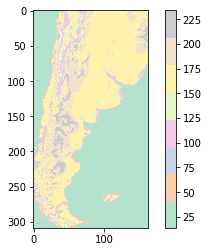

In [ ]:
#@title Ingrese nombre de cmap deseado (ver: https://matplotlib.org/stable/tutorials/colors/colormaps.html) { run: "auto", vertical-output: true }

#Muestro imagen con el mapcolor modificado y a elección del usuario
mapa = "Pastel1" #@param {type:"string"}
print(f"Mapa de color {mapa}")
plt.imshow(Y, cmap = mapa)
plt.colorbar()

# Conclusiones
Se pudo modificar la paleta de colores de una imagen. Para ello, primero se debió obtener la componente de luminancia, ya que el dicho proceso no se podía realizar con una imagen RGB. Una vez obtenida dicha componente, solo basta con llamar al color map deseado. Se implementó un formulario para que el usuario viendo el final de la página (https://matplotlib.org/stable/tutorials/colors/colormaps.html) pueda ingresar la paleta de colores deseada.